#Business Case :Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They want to understand the factors on which the pricing of cars depends.Essentially, the company wants to know:1.Which variables are significant in predicting the price of a car. 2.How well those variables describe the price of a car.

# Load the datafile CarPrice_Assignment.csv

In [517]:
# Import the functions
import pandas as pd
import numpy as np
# read the CSV file
car = pd.read_csv('CarPrice_Assignment.csv')
print(car.shape)


(205, 26)


# Data Cleaning & Prepartion

In [518]:
# Check for duplicate rows and null values in the columns.
car.drop_duplicates()
car.isnull().sum()



car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [519]:
#There are no duplicate rows or missing values in columns
print(car.shape)

(205, 26)


In [520]:
# Create a new column 'carcompany' by splitting the CarName field and taking the the first word as the name of 'car company'
car['carcompany'] = car['CarName'].str.split(' ').str[0]
# Drop the column CarName as it is not needed
car.drop(['CarName'], axis = 1, inplace = True)
# Drop the column 'car_ID as it has no significance on the price value.its just Unique id of each row entry
car.drop(['car_ID'], axis = 1, inplace = True)
# Fix some of the misspellings in the 'carcompany' field.Names of cars makers are spelt differently
car['carcompany'] = car['carcompany'].str.replace('vw','volkswagen')
car['carcompany'] = car['carcompany'].str.replace('vokswagen','volkswagen')
car['carcompany'] = car['carcompany'].str.replace('toyouta','toyota')
car['carcompany'] = car['carcompany'].str.replace('maxda','mazda')
car['carcompany'] = car['carcompany'].str.replace('porcshce','porsche')
car['carcompany'] = car['carcompany'].str.replace('Nissan','nissan')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

#The dataframe car has 205 entries and 25 columns

In [521]:
# Mapping Variables having 2 levels to 1 and 0.- fueltype,aspiration,doornumber,enginelocation
car['fueltype'] = car['fueltype'].map({'gas': 1, 'diesel': 0})
car['aspiration'] = car['aspiration'].map({'std': 1, 'turbo': 0})
car['doornumber'] = car['doornumber'].map({'two': 1, 'four': 0})
car['enginelocation'] = car['enginelocation'].map({'front': 1, 'rear': 0})


In [522]:
# Create dummy variables for independent variables having more than 2 levels -
# carcompany, fuelsystem,cylindernumber,enginetype,carbody,drivewheel
car_dummy = car[['carcompany', 'fuelsystem','cylindernumber','enginetype','carbody','drivewheel']]
dummy = pd.get_dummies(car_dummy, prefix=['carcompany_', 'fuelsystem_','cylindernumber_','enginetype_','carbody_','drivewheel_'], columns=['carcompany', 'fuelsystem','cylindernumber','enginetype','carbody','drivewheel'])
dummy.head(5)

,carcompany__alfa-romero,carcompany__audi,carcompany__bmw,carcompany__buick,carcompany__chevrolet,carcompany__dodge,carcompany__honda,carcompany__isuzu,carcompany__jaguar,carcompany__mazda,...,enginetype__ohcv,enginetype__rotor,carbody__convertible,carbody__hardtop,carbody__hatchback,carbody__sedan,carbody__wagon,drivewheel__4wd,drivewheel__fwd,drivewheel__rwd
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [523]:
# Cocatenate the dummy variables to the car dataframe
car = pd.concat([car,dummy],axis=1)
# drop the columns from where dummy variables were derived
car.drop(['drivewheel'],axis=1,inplace=True)
car.drop(['carbody'],axis=1,inplace=True)
car.drop(['enginetype'],axis=1,inplace=True)
car.drop(['cylindernumber'],axis=1,inplace=True)
car.drop(['fuelsystem'],axis=1,inplace=True)
car.drop(['carcompany'],axis=1,inplace=True)
car.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype__ohcv,enginetype__rotor,carbody__convertible,carbody__hardtop,carbody__hatchback,carbody__sedan,carbody__wagon,drivewheel__4wd,drivewheel__fwd,drivewheel__rwd
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,0,1
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,0,1
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,0,1
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,1,0,0,1,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,1,0,0


In [524]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
symboling                  205 non-null int64
fueltype                   205 non-null int64
aspiration                 205 non-null int64
doornumber                 205 non-null int64
enginelocation             205 non-null int64
wheelbase                  205 non-null float64
carlength                  205 non-null float64
carwidth                   205 non-null float64
carheight                  205 non-null float64
curbweight                 205 non-null int64
enginesize                 205 non-null int64
boreratio                  205 non-null float64
stroke                     205 non-null float64
compressionratio           205 non-null float64
horsepower                 205 non-null int64
peakrpm                    205 non-null int64
citympg                    205 non-null int64
highwaympg                 205 non-null int64
price                      205 non-null float64
carco

# Rescaling the varialbles by Normalization

In [525]:
#normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
# apply the function to all columns 
car = car.apply(normalize)
car.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype__ohcv,enginetype__rotor,carbody__convertible,carbody__hardtop,carbody__hatchback,carbody__sedan,carbody__wagon,drivewheel__4wd,drivewheel__fwd,drivewheel__rwd
0,0.433171,0.097561,0.180488,0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.063415,-0.019512,0.970732,-0.039024,-0.341463,-0.468293,-0.121951,-0.043902,-0.585366,0.629268
1,0.433171,0.097561,0.180488,0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.063415,-0.019512,0.970732,-0.039024,-0.341463,-0.468293,-0.121951,-0.043902,-0.585366,0.629268
2,0.033171,0.097561,0.180488,0.560976,0.014634,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,...,0.936585,-0.019512,-0.029268,-0.039024,0.658537,-0.468293,-0.121951,-0.043902,-0.585366,0.629268
3,0.233171,0.097561,0.180488,-0.439024,0.014634,0.030420,0.038071,0.024350,0.047927,-0.084781,...,-0.063415,-0.019512,-0.029268,-0.039024,-0.341463,0.531707,-0.121951,-0.043902,0.414634,-0.370732
4,0.233171,0.097561,0.180488,-0.439024,0.014634,0.018758,0.038071,0.041016,0.047927,0.104125,...,-0.063415,-0.019512,-0.029268,-0.039024,-0.341463,0.531707,-0.121951,0.956098,-0.585366,-0.370732


# Splitting Data into Training and Testing Sets

In [526]:
car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__bmw', 'carcompany__buick',
       'carcompany__chevrolet', 'carcompany__dodge', 'carcompany__honda',
       'carcompany__isuzu', 'carcompany__jaguar', 'carcompany__mazda',
       'carcompany__mercury', 'carcompany__mitsubishi', 'carcompany__nissan',
       'carcompany__peugeot', 'carcompany__plymouth', 'carcompany__porsche',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'carcompany__volvo',
       'fuelsystem__1bbl', 'fuelsystem__2bbl', 'fuelsystem__4bbl',
       'fuelsystem__idi', 'fuelsystem__mfi', 'fuelsystem__mpfi',
       'fuelsystem__spdi', 'fuelsystem__spfi',

In [527]:
# Putting feature variable to X
X = car[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg','carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__bmw', 'carcompany__buick',
       'carcompany__chevrolet', 'carcompany__dodge', 'carcompany__honda',
       'carcompany__isuzu', 'carcompany__jaguar', 'carcompany__mazda',
       'carcompany__mercury', 'carcompany__mitsubishi', 'carcompany__nissan',
       'carcompany__peugeot', 'carcompany__plymouth', 'carcompany__porsche',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'carcompany__volvo',
       'fuelsystem__1bbl', 'fuelsystem__2bbl', 'fuelsystem__4bbl',
       'fuelsystem__idi', 'fuelsystem__mfi', 'fuelsystem__mpfi',
       'fuelsystem__spdi', 'fuelsystem__spfi', 'cylindernumber__eight',
       'cylindernumber__five', 'cylindernumber__four', 'cylindernumber__six',
       'cylindernumber__three', 'cylindernumber__twelve',
       'cylindernumber__two', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcf',
       'enginetype__ohcv', 'enginetype__rotor', 'carbody__convertible',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd']]

# Putting response variable to y
y = car['price']

In [528]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [529]:
# Function for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)



# Start building the Linear Model

#We will first begin with condidering all independent variables and then use RFE to eliminate non essentials ones.There will will multiple models to analyze subsequently.

# Model 1 - Consider all independent variables though this is not ideal

In [530]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.59
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           1.40e-49
Time:                        23:29:27   Log-Likelihood:                 295.32
No. Observations:                 143   AIC:                            -474.6
Df Residuals:                      85   BIC:                            -302.8
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
symboling                 

In [531]:
# Calculating Vif value
vif_cal(input_data=car, dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
35,carcompany__saab,inf
44,fuelsystem__mfi,inf
50,cylindernumber__four,inf
49,cylindernumber__five,inf
48,cylindernumber__eight,inf
47,fuelsystem__spfi,inf
46,fuelsystem__spdi,inf
45,fuelsystem__mpfi,inf
43,fuelsystem__idi,inf
52,cylindernumber__three,inf


# Model 1 has strong multicollinearity problems.98% of the variables are above the acceptable values of VIF and p-value

# Model 2 - RFE with 60 independent variables

In [532]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 60)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[False  True False False  True  True  True  True False  True  True  True
  True  True False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[10  1  8 11  1  1  1  1  4  1  1  1  1  1  6  5  9  7  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  3
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [533]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fuelsystem__mfi',
       'fuelsystem__spfi'],
      dtype='object')

In [534]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     53.76
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           6.76e-51
Time:                        23:29:39   Log-Likelihood:                 273.80
No. Observations:                 143   AIC:                            -447.6
Df Residuals:                      93   BIC:                            -299.4
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
fueltype                  

In [535]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fuelsystem__mfi',
       'fuelsystem__spfi'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
46,enginetype__dohcv,inf
1,enginelocation,inf
31,carcompany__volvo,inf
35,fuelsystem__idi,inf
38,cylindernumber__eight,inf
39,cylindernumber__five,inf
40,cylindernumber__four,inf
41,cylindernumber__six,inf
42,cylindernumber__three,inf


# Model 2 has strong multicollinearity problems as well.Most of the variables are above the acceptable values of VIF and p-value

# Model 3 - RFE with 50 independent variables

In [536]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True False False  True  True  True  True False  True  True  True
  True  True False False False False  True  True  True  True False  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True False  True  True  True  True  True False  True  True False
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True False  True False False False False  True]
[20  1 18 21  1  1  1  1 14  1  1  1  1  1 16 15 19 17  1  1  1  1  8  1
  1  1  1  1 11  1  1  1  1  1  7  1  1  1  9  1  1  1  1  1 12  1  1 13
  1  1  1  1  1  1  1  1  1  4  1  1  1  1  1 10  1  6  5  2  3  1]


In [537]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__chevrolet',
       'carcompany__mercury', 'carcompany__renault', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'enginetype__l',
       'carbody__hardtop', 'carbody__sedan', 'carbody__wagon',
       'drivewheel__4wd', 'drivewheel__fwd'],
      dtype='object')

In [538]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     62.89
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           2.79e-55
Time:                        23:29:48   Log-Likelihood:                 273.58
No. Observations:                 143   AIC:                            -457.2
Df Residuals:                      98   BIC:                            -323.8
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [539]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__chevrolet',
       'carcompany__mercury', 'carcompany__renault', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'enginetype__l',
       'carbody__hardtop', 'carbody__sedan', 'carbody__wagon',
       'drivewheel__4wd', 'drivewheel__fwd'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
39,cylindernumber__twelve,inf
31,fuelsystem__idi,inf
34,cylindernumber__eight,inf
35,cylindernumber__five,inf
36,cylindernumber__four,inf
37,cylindernumber__six,inf
38,cylindernumber__three,inf
40,cylindernumber__two,inf
21,carcompany__peugeot,inf


# Model 3 too has high multicollinearity problems.Most of the variables are above the acceptable values of VIF and p-value

# Model 4 - RFE with 40 independent variables

In [540]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 40)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True False False  True  True  True  True False  True  True  True
  True  True False False False False  True False  True False False False
 False  True False False False  True  True  True False  True False  True
  True False False  True  True  True  True  True False  True  True False
  True  True  True  True  True  True  True  True False False  True  True
  True  True  True False False False False False False  True]
[30  1 28 31  1  1  1  1 24  1  1  1  1  1 26 25 29 27  1  2  1 10 18  5
  7  1  3  8 21  1  1  1  4  1 17  1  1  6 19  1  1  1  1  1 22  1  1 23
  1  1  1  1  1  1  1  1  9 14  1  1  1  1  1 20 11 16 15 12 13  1]


In [541]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__audi',
       'carcompany__buick', 'carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__jaguar', 'carcompany__mazda',
       'carcompany__mercury', 'carcompany__plymouth', 'carcompany__renault',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__mfi',
       'fuelsystem__spfi', 'enginetype__dohcv', 'enginetype__l',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd'],
      dtype='object')

In [542]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     81.98
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           1.32e-62
Time:                        23:29:56   Log-Likelihood:                 270.02
No. Observations:                 143   AIC:                            -468.0
Df Residuals:                     107   BIC:                            -361.4
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [543]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__audi',
       'carcompany__buick', 'carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__jaguar', 'carcompany__mazda',
       'carcompany__mercury', 'carcompany__plymouth', 'carcompany__renault',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__mfi',
       'fuelsystem__spfi', 'enginetype__dohcv', 'enginetype__l',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
35,enginetype__ohcf,inf
23,fuelsystem__idi,inf
28,cylindernumber__four,inf
1,enginelocation,inf
29,cylindernumber__six,inf
18,carcompany__subaru,inf
30,cylindernumber__three,inf
31,cylindernumber__twelve,inf
32,cylindernumber__two,inf


# Model 5 - RFE with 30 independent variables

In [544]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True False False  True  True  True  True False  True  True  True
  True  True False False False False False False  True False False False
 False False False False False False False  True False  True False  True
  True False False  True  True  True  True  True False  True  True False
  True False False  True  True  True  True False False False False  True
 False  True  True False False False False False False False]
[40  1 38 41  1  1  1  1 34  1  1  1  1  1 36 35 39 37 11 12  1 20 28 15
 17  2 13 18 31  4  8  1 14  1 27  1  1 16 29  1  1  1  1  1 32  1  1 33
  1  7  3  1  1  1  1 10 19 24  5  1  6  1  1 30 21 26 25 22 23  9]


In [545]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd'],
      dtype='object')

In [546]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     88.93
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           1.48e-64
Time:                        23:30:02   Log-Likelihood:                 249.69
No. Observations:                 143   AIC:                            -445.4
Df Residuals:                     116   BIC:                            -365.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [547]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carcompany__alfa-romero',
       'carcompany__audi', 'carcompany__buick', 'carcompany__chevrolet',
       'carcompany__dodge', 'carcompany__honda', 'carcompany__isuzu',
       'carcompany__jaguar', 'carcompany__mazda', 'carcompany__mercury',
       'carcompany__mitsubishi', 'carcompany__nissan', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__toyota', 'carcompany__volkswagen',
       'fuelsystem__mfi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
28,enginetype__rotor,inf
19,fuelsystem__idi,inf
1,enginelocation,inf
14,carcompany__subaru,inf
27,enginetype__ohcf,inf
26,cylindernumber__two,inf
9,compressionratio,100.830000
20,fuelsystem__mpfi,28.580000
6,enginesize,26.070000


# Model 6 - RFE with 20 independent variables

In [548]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False False  True False False  True False  True  True  True
  True  True False False False False False False  True False False False
 False False False False False False False False False  True False  True
 False False False  True False False False  True False False False False
  True False False  True  True  True  True False False False False  True
 False  True  True False False False False False False False]
[50  3 48 51  1  9  2  1 44  1  1  1  1  1 46 45 49 47 21 22  1 30 38 25
 27 12 23 28 41 14 18 11 24  1 37  1 10 26 39  1  7  6  4  1 42  8  5 43
  1 17 13  1  1  1  1 20 29 34 15  1 16  1  1 40 31 36 35 32 33 19]


In [549]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick', 'carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__subaru', 'carcompany__toyota',
       'carcompany__volkswagen', 'fuelsystem__1bbl', 'fuelsystem__2bbl',
       'fuelsystem__4bbl', 'fuelsystem__mfi', 'fuelsystem__mpfi',
       'fuelsystem__spdi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
      

In [550]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     119.2
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           9.68e-70
Time:                        23:30:07   Log-Likelihood:                 244.32
No. Observations:                 143   AIC:                            -448.6
Df Residuals:                     123   BIC:                            -389.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [551]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick', 'carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__subaru', 'carcompany__toyota',
       'carcompany__volkswagen', 'fuelsystem__1bbl', 'fuelsystem__2bbl',
       'fuelsystem__4bbl', 'fuelsystem__mfi', 'fuelsystem__mpfi',
       'fuelsystem__spdi', 'fuelsystem__spfi', 'cylindernumber__five',
       'cylindernumber__four', 'enginetype__dohc', 'enginetype__dohcv',
       'enginetype__l', 'enginetype__ohc', 'enginetype__ohcv',
       'carbody__hardtop', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'drivewheel__4wd', 'drivewheel__fwd',
       'drivewheel__rwd'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
18,enginetype__rotor,inf
16,cylindernumber__two,inf
11,fuelsystem__idi,70.070000
6,compressionratio,64.810000
3,enginesize,21.280000
2,curbweight,12.040000
1,carwidth,5.610000
13,cylindernumber__six,5.050000
4,boreratio,4.860000
12,cylindernumber__eight,4.130000


# Model 7 - RFE with 15 independent variables

In [552]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False False  True False False  True False  True  True  True
  True False False False False False False False  True False False False
 False False False False False False False False False  True False False
 False False False  True False False False False False False False False
  True False False  True  True  True  True False False False False False
 False  True False False False False False False False False]
[55  8 53 56  1 14  7  1 49  1  1  1  1  3 51 50 54 52 26 27  1 35 43 30
 32 17 28 33 46 19 23 16 29  1 42  4 15 31 44  1 12 11  9  2 47 13 10 48
  1 22 18  1  1  1  1 25 34 39 20  5 21  1  6 45 36 41 40 37 38 24]


In [553]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick', 'carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'engine

In [554]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_7 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     139.2
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           3.20e-70
Time:                        23:30:42   Log-Likelihood:                 231.47
No. Observations:                 143   AIC:                            -432.9
Df Residuals:                     128   BIC:                            -388.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [555]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick', 'carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
13,cylindernumber__two,inf
14,enginetype__rotor,inf
3,enginesize,20.660000
2,curbweight,9.290000
1,carwidth,5.220000
10,cylindernumber__six,4.290000
9,cylindernumber__eight,4.010000
4,boreratio,3.620000
0,enginelocation,3.370000
7,carcompany__porsche,3.250000


# We have arrived at 15 independent variables where the model has started to take shape.We will check the correlation between them and work with the variables one by one till we reach the significant 4 to 5 variables that relate best to the price of cars.#Eliminate one by one the ones that have high VIF or P-Value > 0.01.

In [556]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

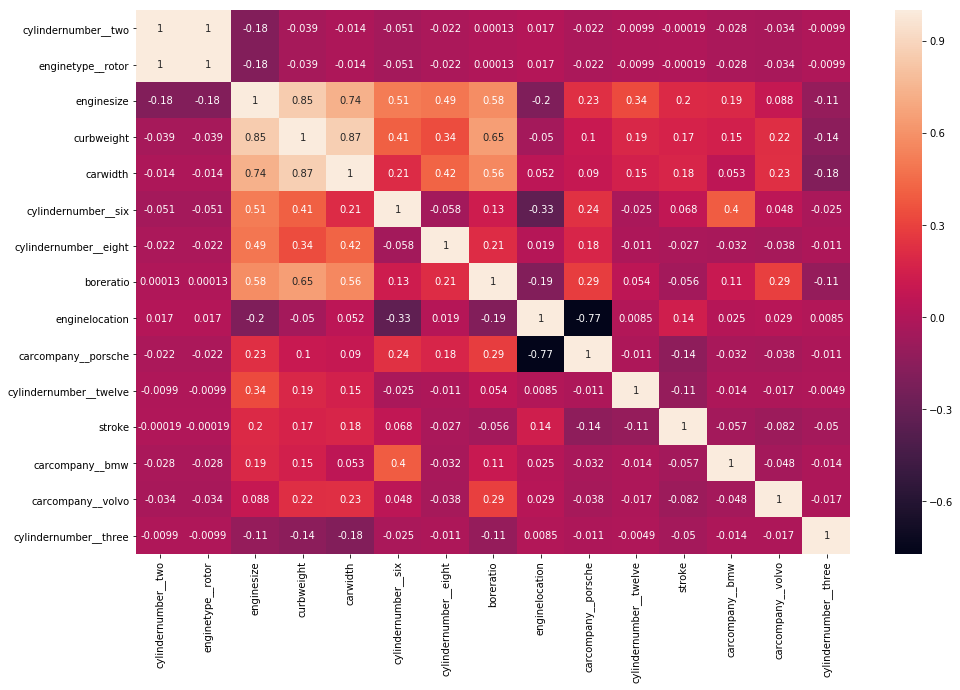

In [557]:
# the correlation matrix for variables in Model 7 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['cylindernumber__two','enginetype__rotor','enginesize','curbweight','carwidth','cylindernumber__six','cylindernumber__eight',
'boreratio','enginelocation','carcompany__porsche','cylindernumber__twelve','stroke','carcompany__bmw','carcompany__volvo','cylindernumber__three']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 8 - Drop 'cylindernumber__two' and 'enginetype__rotor' as they have high VIF suggesting high correlation

In [558]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
        'carcompany__chevrolet', 'carcompany__dodge','carcompany__buick',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor'], 1)

In [559]:
# Create the fitted model
lm_8 = sm.OLS(y_train,X_train).fit()

In [560]:
#Summary of linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     102.6
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           1.17e-61
Time:                        23:31:24   Log-Likelihood:                 205.28
No. Observations:                 143   AIC:                            -384.6
Df Residuals:                     130   BIC:                            -346.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
enginelocation            -0

In [561]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick', 'carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor'], axis=1), dependent_col="price")

,Var,Vif
3,enginesize,14.39
2,curbweight,8.84
1,carwidth,5.16
10,cylindernumber__six,3.64
9,cylindernumber__eight,3.26
0,enginelocation,3.24
4,boreratio,3.18
7,carcompany__porsche,3.16
12,cylindernumber__twelve,2.30
5,stroke,1.61


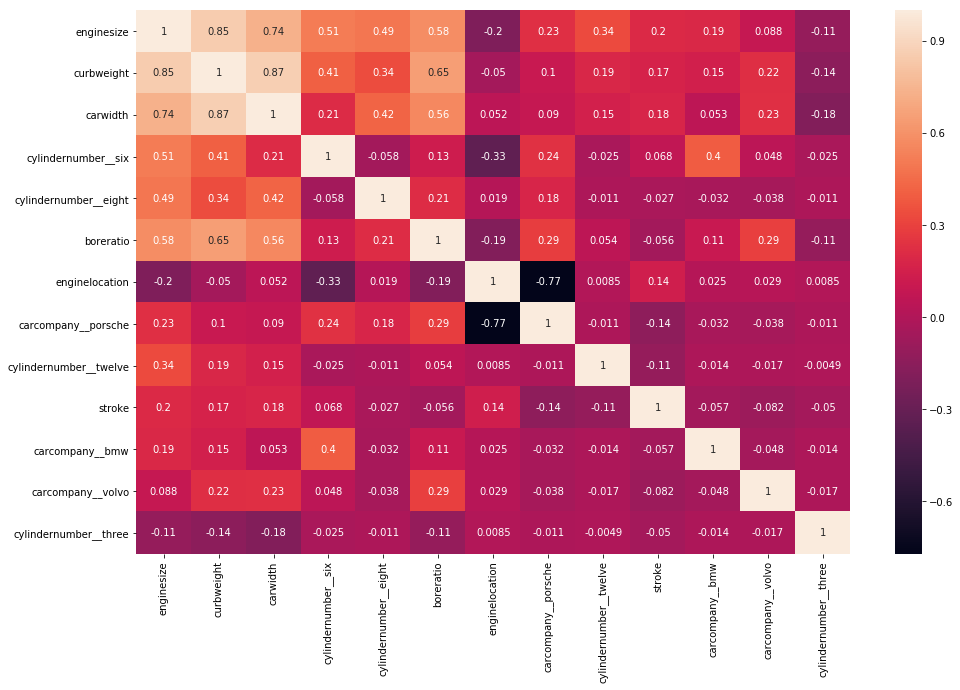

In [562]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['enginesize','curbweight','carwidth','cylindernumber__six','cylindernumber__eight',
'boreratio','enginelocation','carcompany__porsche','cylindernumber__twelve','stroke','carcompany__bmw','carcompany__volvo','cylindernumber__three']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 9 -Drop 'cylindernumber__eight' as it has high p-value of 0.342

In [563]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['cylindernumber__eight'], 1)

In [564]:
# Create a fitted model
lm_9 = sm.OLS(y_train,X_train).fit()
#Let's see the linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     111.1
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           1.69e-62
Time:                        23:31:32   Log-Likelihood:                 204.79
No. Observations:                 143   AIC:                            -385.6
Df Residuals:                     131   BIC:                            -350.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
enginelocation            -0

In [565]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick', 'carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor','cylindernumber__eight'], axis=1), dependent_col="price")

,Var,Vif
2,curbweight,8.38
3,enginesize,6.36
1,carwidth,5.15
0,enginelocation,2.94
7,carcompany__porsche,2.84
4,boreratio,2.54
9,cylindernumber__six,2.37
11,cylindernumber__twelve,1.46
6,carcompany__bmw,1.30
5,stroke,1.26


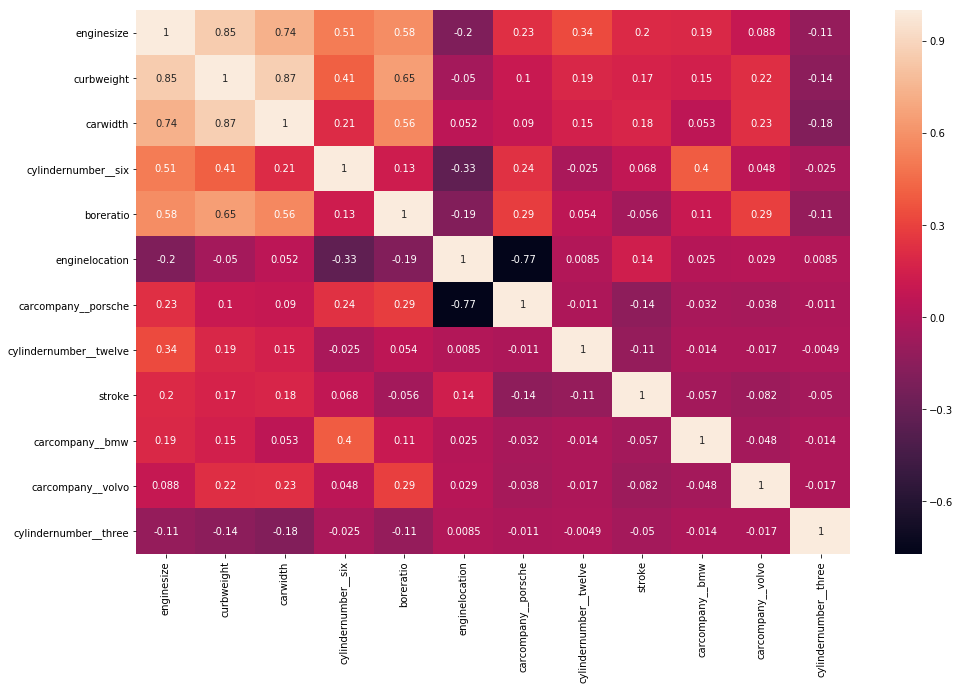

In [566]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['enginesize','curbweight','carwidth','cylindernumber__six',
'boreratio','enginelocation','carcompany__porsche','cylindernumber__twelve','stroke','carcompany__bmw','carcompany__volvo','cylindernumber__three']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 10 -Drop 'cylindernumber__twelve' as it has high p-value of 0.099

In [567]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['cylindernumber__twelve'], 1)

In [568]:
# Create fitted model
lm_10 = sm.OLS(y_train,X_train).fit()
#summary of linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     119.4
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           5.84e-63
Time:                        23:31:39   Log-Likelihood:                 203.30
No. Observations:                 143   AIC:                            -384.6
Df Residuals:                     132   BIC:                            -352.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
enginelocation           -0.34

In [569]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick', 'carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor','cylindernumber__eight','cylindernumber__twelve'], axis=1), dependent_col="price")

,Var,Vif
2,curbweight,8.38
1,carwidth,5.06
3,enginesize,4.81
0,enginelocation,2.94
7,carcompany__porsche,2.84
4,boreratio,2.38
9,cylindernumber__six,2.14
6,carcompany__bmw,1.30
8,carcompany__volvo,1.21
5,stroke,1.16


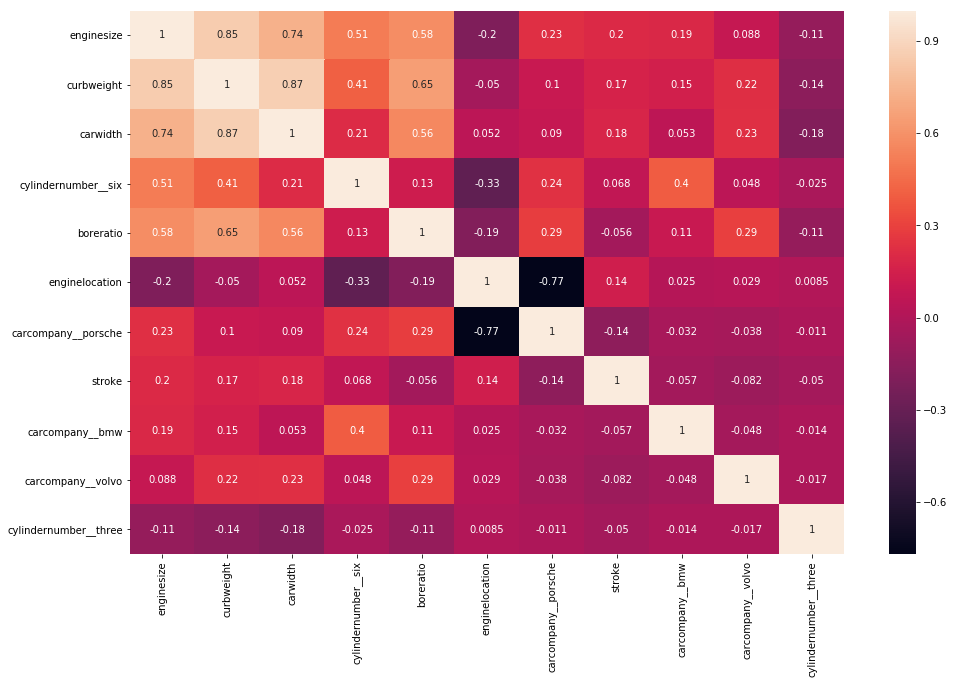

In [570]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['enginesize','curbweight','carwidth','cylindernumber__six',
'boreratio','enginelocation','carcompany__porsche','stroke','carcompany__bmw','carcompany__volvo','cylindernumber__three']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 11 -Drop 'stroke' as it has high p-value of 0.122

In [571]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['stroke'], 1)

In [572]:
# Create a fitted model
lm_11 = sm.OLS(y_train,X_train).fit()
#the summary of our linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           1.64e-63
Time:                        23:31:49   Log-Likelihood:                 202.00
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     133   BIC:                            -354.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
enginelocation           -0.34

In [573]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
        'carcompany__buick','carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor','cylindernumber__eight',
        'cylindernumber__twelve','stroke'], axis=1), dependent_col="price")

,Var,Vif
2,curbweight,8.38
1,carwidth,5.05
3,enginesize,4.68
0,enginelocation,2.93
6,carcompany__porsche,2.83
4,boreratio,2.32
8,cylindernumber__six,2.14
5,carcompany__bmw,1.28
7,carcompany__volvo,1.21
9,cylindernumber__three,1.04


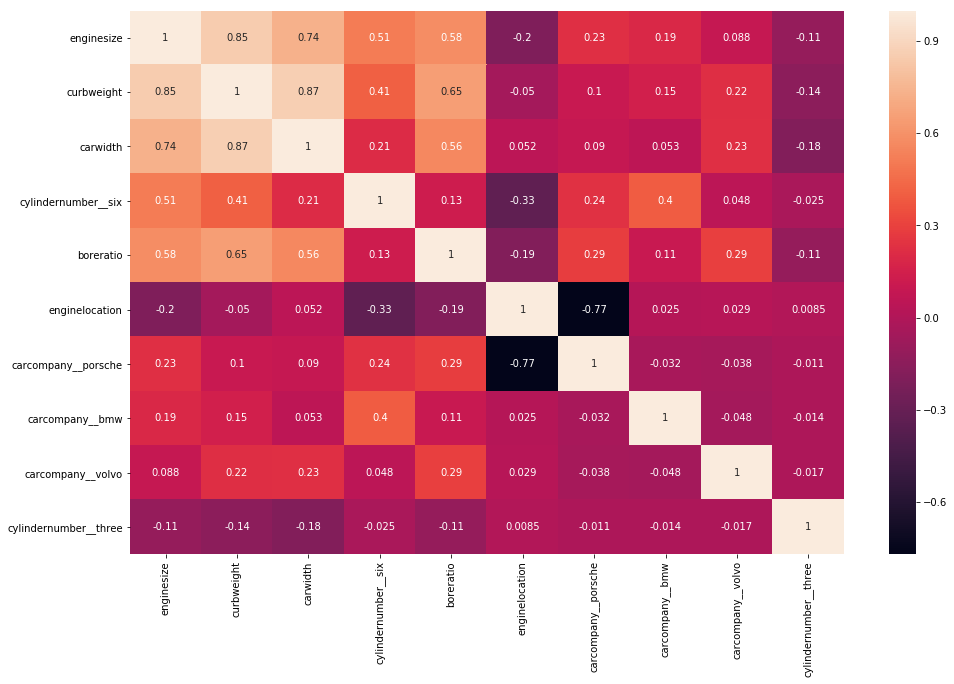

In [574]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['enginesize','curbweight','carwidth','cylindernumber__six',
'boreratio','enginelocation','carcompany__porsche','carcompany__bmw','carcompany__volvo','cylindernumber__three']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 12 - Drop 'carcompany__volvo' as it has high p-value of 0.049


In [575]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['carcompany__volvo'], 1)

In [576]:
# Create a second fitted model
lm_12 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     140.6
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           9.32e-64
Time:                        23:32:09   Log-Likelihood:                 199.90
No. Observations:                 143   AIC:                            -381.8
Df Residuals:                     134   BIC:                            -355.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
enginelocation           -0.34

In [577]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
        'carcompany__buick','carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor','cylindernumber__eight',
        'cylindernumber__twelve','stroke','carcompany__volvo'], axis=1), dependent_col="price")

,Var,Vif
2,curbweight,8.37
1,carwidth,4.96
3,enginesize,4.44
0,enginelocation,2.92
6,carcompany__porsche,2.79
4,boreratio,2.14
7,cylindernumber__six,2.09
5,carcompany__bmw,1.27
8,cylindernumber__three,1.04


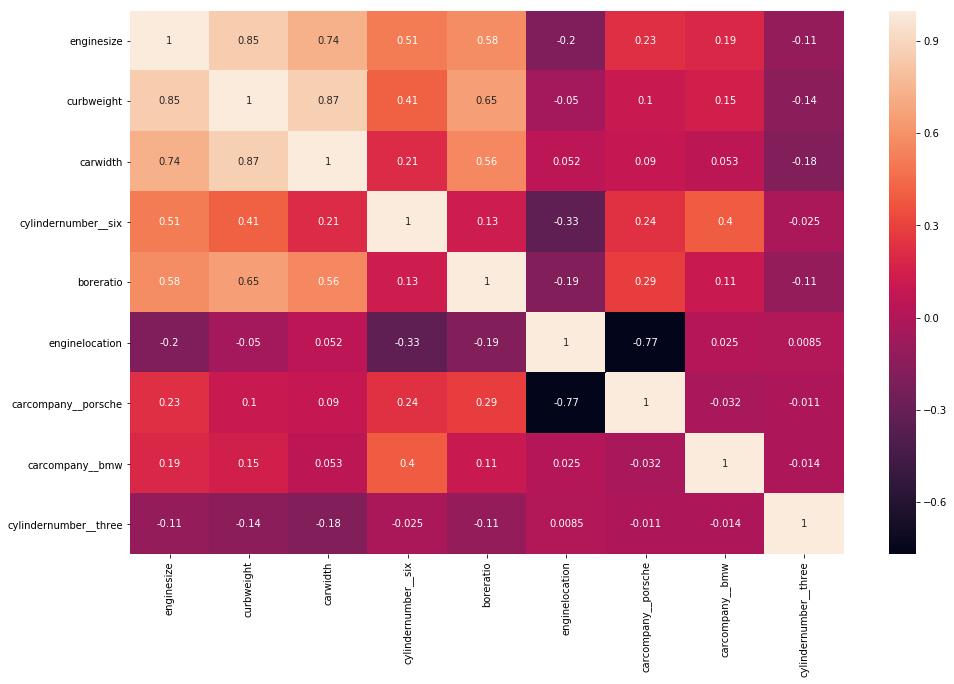

In [578]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['enginesize','curbweight','carwidth','cylindernumber__six',
'boreratio','enginelocation','carcompany__porsche','carcompany__bmw','cylindernumber__three']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 13- Drop 'cylindernumber__six' as it has high p-value of 0.031


In [579]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['cylindernumber__six'], 1)

In [580]:
# Create a second fitted model
lm_13 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     153.3
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           7.36e-64
Time:                        23:32:51   Log-Likelihood:                 197.42
No. Observations:                 143   AIC:                            -378.8
Df Residuals:                     135   BIC:                            -355.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
enginelocation           -0.31

In [581]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
        'carcompany__buick','carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor','cylindernumber__eight',
        'cylindernumber__twelve','stroke','carcompany__volvo','cylindernumber__six','cylindernumber__three'], axis=1), dependent_col="price")

,Var,Vif
2,curbweight,7.70
1,carwidth,4.56
3,enginesize,4.09
0,enginelocation,2.79
6,carcompany__porsche,2.78
4,boreratio,1.89
5,carcompany__bmw,1.08


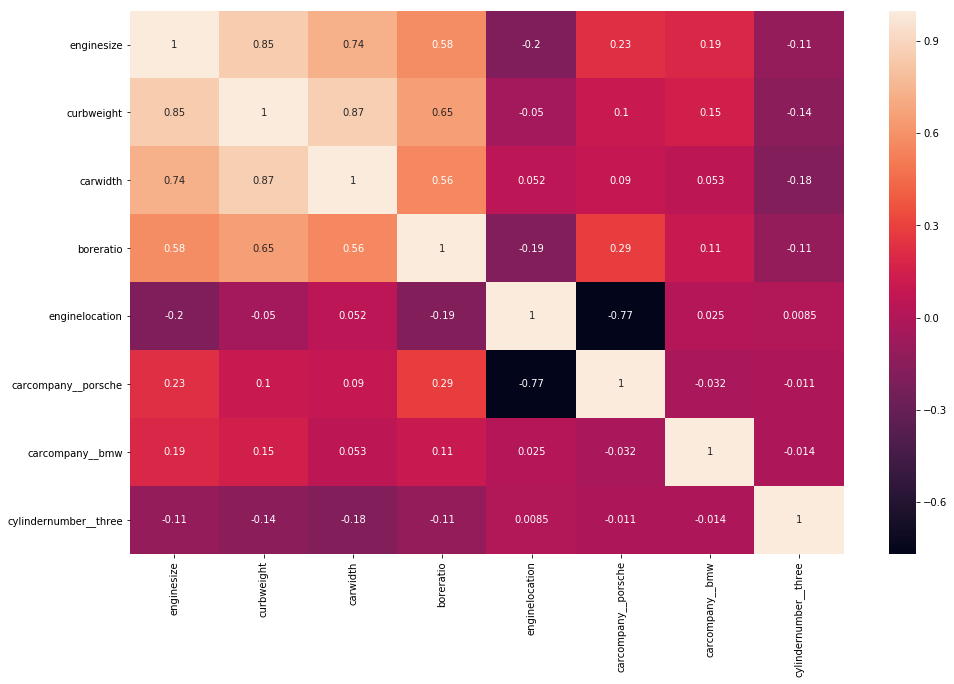

In [582]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['enginesize','curbweight','carwidth',
'boreratio','enginelocation','carcompany__porsche','carcompany__bmw','cylindernumber__three']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 14- Drop 'cylindernumber__three' as it has high p-value of 0.014


In [583]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['cylindernumber__three'], 1)

In [584]:
# Create a second fitted model
lm_14 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.9
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           1.10e-63
Time:                        23:33:44   Log-Likelihood:                 194.22
No. Observations:                 143   AIC:                            -374.4
Df Residuals:                     136   BIC:                            -353.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginelocation         -0.3090    

In [585]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick','carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor','cylindernumber__eight',
        'cylindernumber__twelve','stroke','carcompany__volvo','cylindernumber__six','cylindernumber__three'], axis=1), dependent_col="price")

,Var,Vif
2,curbweight,7.70
1,carwidth,4.56
3,enginesize,4.09
0,enginelocation,2.79
6,carcompany__porsche,2.78
4,boreratio,1.89
5,carcompany__bmw,1.08


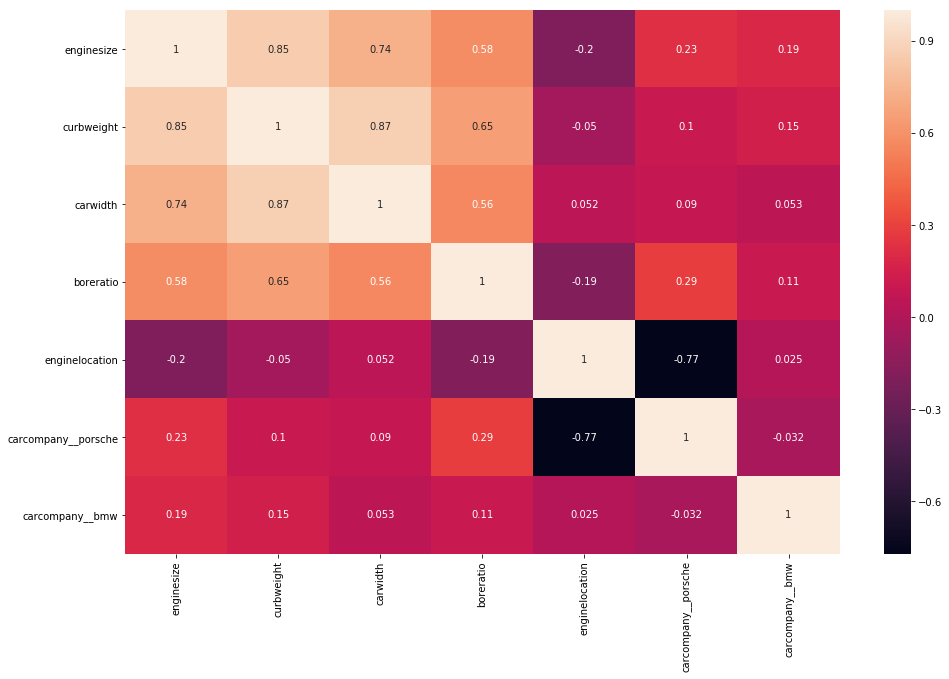

In [586]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['enginesize','curbweight','carwidth',
'boreratio','enginelocation','carcompany__porsche','carcompany__bmw']]
sns.heatmap(car_corr.corr(),annot = True)

# Now let's look at VFI numbers
# Model 15 - Drop 'curbweight' as it has high VIF of 7.70

In [587]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['curbweight'], 1)

In [588]:
# Create a second fitted model
lm_15 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     167.1
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           1.78e-60
Time:                        23:34:45   Log-Likelihood:                 183.67
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     137   BIC:                            -337.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginelocation         -0.3422    

In [589]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick','carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor','cylindernumber__eight',
        'cylindernumber__twelve','stroke','carcompany__volvo','cylindernumber__six','cylindernumber__three',
                            'curbweight'], axis=1), dependent_col="price")

,Var,Vif
2,enginesize,2.80
0,enginelocation,2.75
1,carwidth,2.69
5,carcompany__porsche,2.64
3,boreratio,1.70
4,carcompany__bmw,1.07


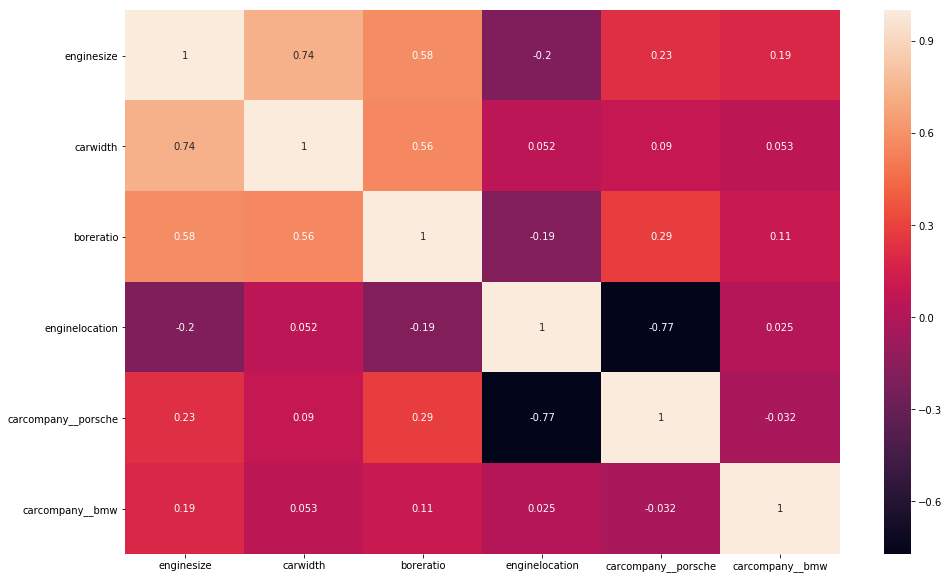

In [590]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['enginesize','carwidth',
'boreratio','enginelocation','carcompany__porsche','carcompany__bmw']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 16 - Drop 'boreratio' as model 15 resulted in a high p-value of 0.183 for boreratio

In [591]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['boreratio'], 1)

In [592]:
# Create a second fitted model
lm_16 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     199.1
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           2.91e-61
Time:                        23:35:56   Log-Likelihood:                 182.74
No. Observations:                 143   AIC:                            -355.5
Df Residuals:                     138   BIC:                            -340.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginelocation         -0.3404    

In [593]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick','carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor','cylindernumber__eight',
        'cylindernumber__twelve','stroke','carcompany__volvo','cylindernumber__six','cylindernumber__three',
                            'curbweight','boreratio'], axis=1), dependent_col="price")

,Var,Vif
0,enginelocation,2.75
2,enginesize,2.65
4,carcompany__porsche,2.58
1,carwidth,2.52
3,carcompany__bmw,1.07


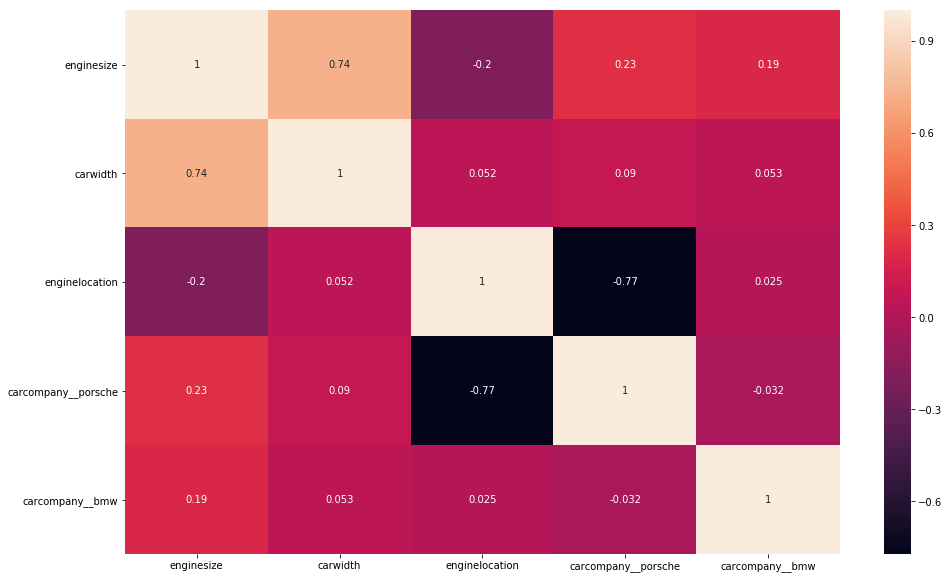

In [594]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['enginesize','carwidth',
'enginelocation','carcompany__porsche','carcompany__bmw']]
sns.heatmap(car_corr.corr(),annot = True)

# Model 17 - Drop 'carcompany__porsche' as it has high p-value of 0.149 post model 16

In [595]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['carcompany__porsche'], 1)

In [596]:
# Create a second fitted model
lm_17 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our second linear model
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     246.4
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           4.92e-62
Time:                        23:36:40   Log-Likelihood:                 181.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     139   BIC:                            -343.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation     -0.4139      0.072     

In [597]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carcompany__alfa-romero', 'carcompany__audi',
       'carcompany__buick', 'carcompany__chevrolet', 'carcompany__dodge',
       'carcompany__honda', 'carcompany__isuzu', 'carcompany__jaguar',
       'carcompany__mazda', 'carcompany__mercury', 'carcompany__mitsubishi',
       'carcompany__nissan', 'carcompany__peugeot', 'carcompany__plymouth',
       'carcompany__renault', 'carcompany__saab', 'carcompany__subaru',
       'carcompany__toyota', 'carcompany__volkswagen', 'fuelsystem__1bbl',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'cylindernumber__five', 'cylindernumber__four',
       'enginetype__dohc', 'enginetype__dohcv', 'enginetype__l',
       'enginetype__ohc', 'enginetype__ohcf', 'enginetype__ohcv',
       'carbody__convertible', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__4wd',
       'drivewheel__fwd', 'drivewheel__rwd','cylindernumber__two','enginetype__rotor','cylindernumber__eight',
        'cylindernumber__twelve','stroke','carcompany__volvo','cylindernumber__six','cylindernumber__three',
                            'curbweight','boreratio','carcompany__porsche'], axis=1), dependent_col="price")

,Var,Vif
2,enginesize,2.64
1,carwidth,2.45
0,enginelocation,1.15
3,carcompany__bmw,1.07


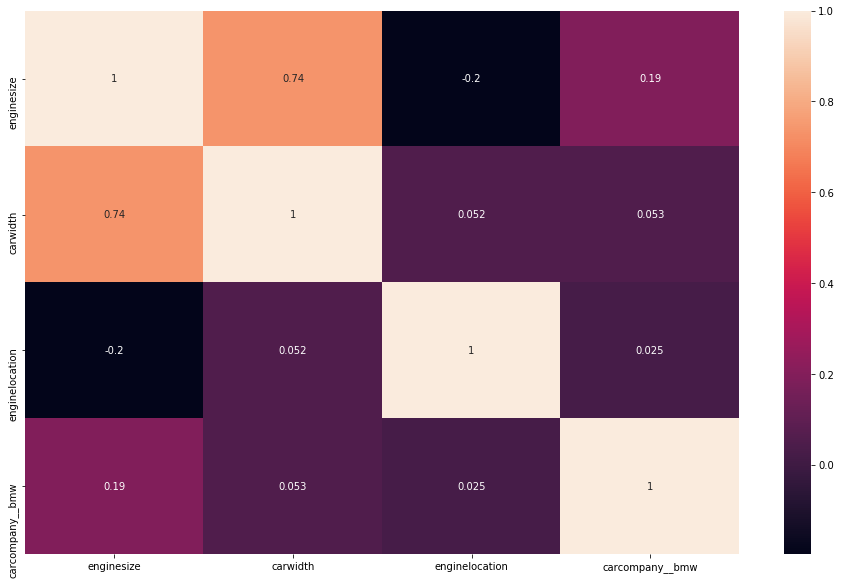

In [598]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['enginesize','carwidth',
'enginelocation','carcompany__bmw']]
sns.heatmap(car_corr.corr(),annot = True)

# We have arrived at the 4 variables that have low p-value and acceptable VIF value.The adjusted R value is 0.874.This seems to be the right model.

# Making Predictions Using the Model 17

In [599]:
# Adding  constant variable to test dataframe
X_test_m17 = sm.add_constant(X_test)


In [600]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m17 = X_test_m17.drop(["symboling", "fueltype", "aspiration", "doornumber", "wheelbase",
       "carlength", "carheight", "compressionratio", "horsepower", "peakrpm",
       "citympg", "highwaympg", "carcompany__alfa-romero", "carcompany__audi",
       "carcompany__buick", "carcompany__chevrolet", "carcompany__dodge",
       "carcompany__honda", "carcompany__isuzu", "carcompany__jaguar",
       "carcompany__mazda", "carcompany__mercury", "carcompany__mitsubishi",
       "carcompany__nissan", "carcompany__peugeot", "carcompany__plymouth",
       "carcompany__renault", "carcompany__saab", "carcompany__subaru",
       "carcompany__toyota", "carcompany__volkswagen", "fuelsystem__1bbl",
       "fuelsystem__2bbl", "fuelsystem__4bbl", "fuelsystem__idi",
       "fuelsystem__mfi", "fuelsystem__mpfi", "fuelsystem__spdi",
       "fuelsystem__spfi", "cylindernumber__five", "cylindernumber__four",
       "enginetype__dohc", "enginetype__dohcv", "enginetype__l",
       "enginetype__ohc", "enginetype__ohcf", "enginetype__ohcv",
       "carbody__convertible", "carbody__hardtop", "carbody__hatchback",
       "carbody__sedan", "carbody__wagon", "drivewheel__4wd",
       "drivewheel__fwd", "drivewheel__rwd","cylindernumber__two","enginetype__rotor","cylindernumber__eight",
        "cylindernumber__twelve","stroke","carcompany__volvo","cylindernumber__six","cylindernumber__three",
                            "curbweight","boreratio","carcompany__porsche"], axis=1)


In [601]:
# Making predictions
y_pred_m17 = lm_17.predict(X_test_m17)

# Evaluating Model 17

Text(0,0.5,'Car Price')

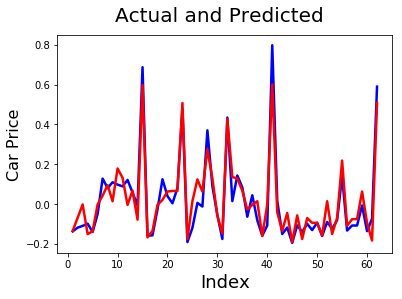

In [602]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m17, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

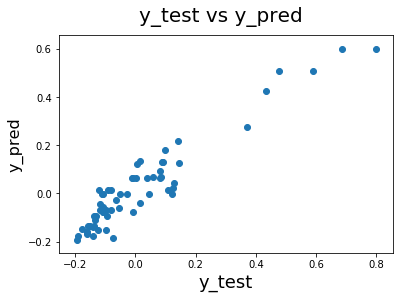

In [603]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m17)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

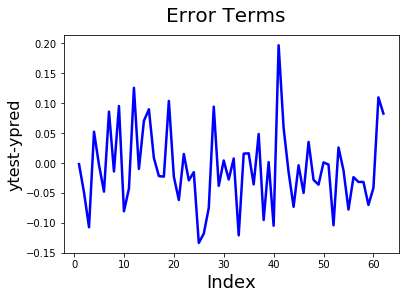

In [604]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_m17, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

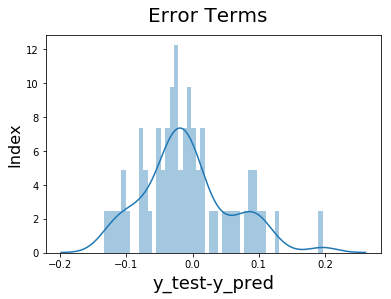

In [605]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m17),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)

# Conclusions: